In [58]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns

In [59]:
#from sklearn import datasets  
from sklearn import datasets,tree
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets,tree
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

#Importing the data 

In [60]:
df = pd.read_csv("/content/Fraud_check.csv")

In [61]:
df1 = df.copy()

In [62]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [63]:
  df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [64]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [65]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### Outlier Check

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


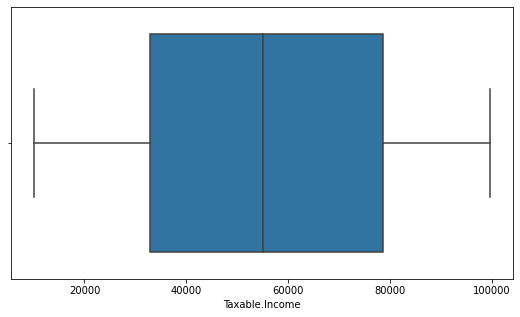

In [66]:
ax = sns.boxplot(df1['Taxable.Income'])

In [67]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


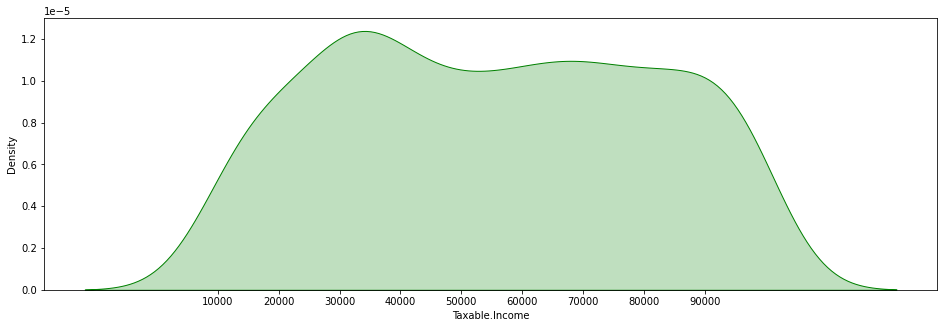

In [68]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

The data is skewed on the right side. Skew: 0.030014788906377175.  
The data has negative Kurtosis. Kurtosis: -1.1997824607083138.


In [69]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


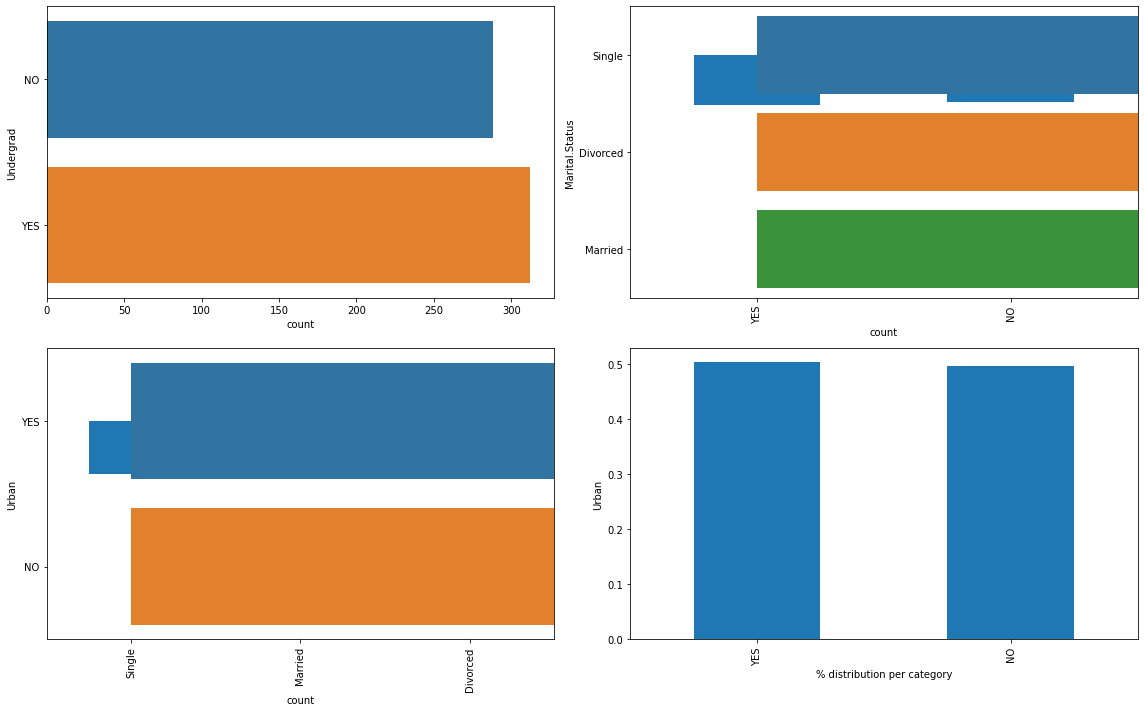

In [70]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [71]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

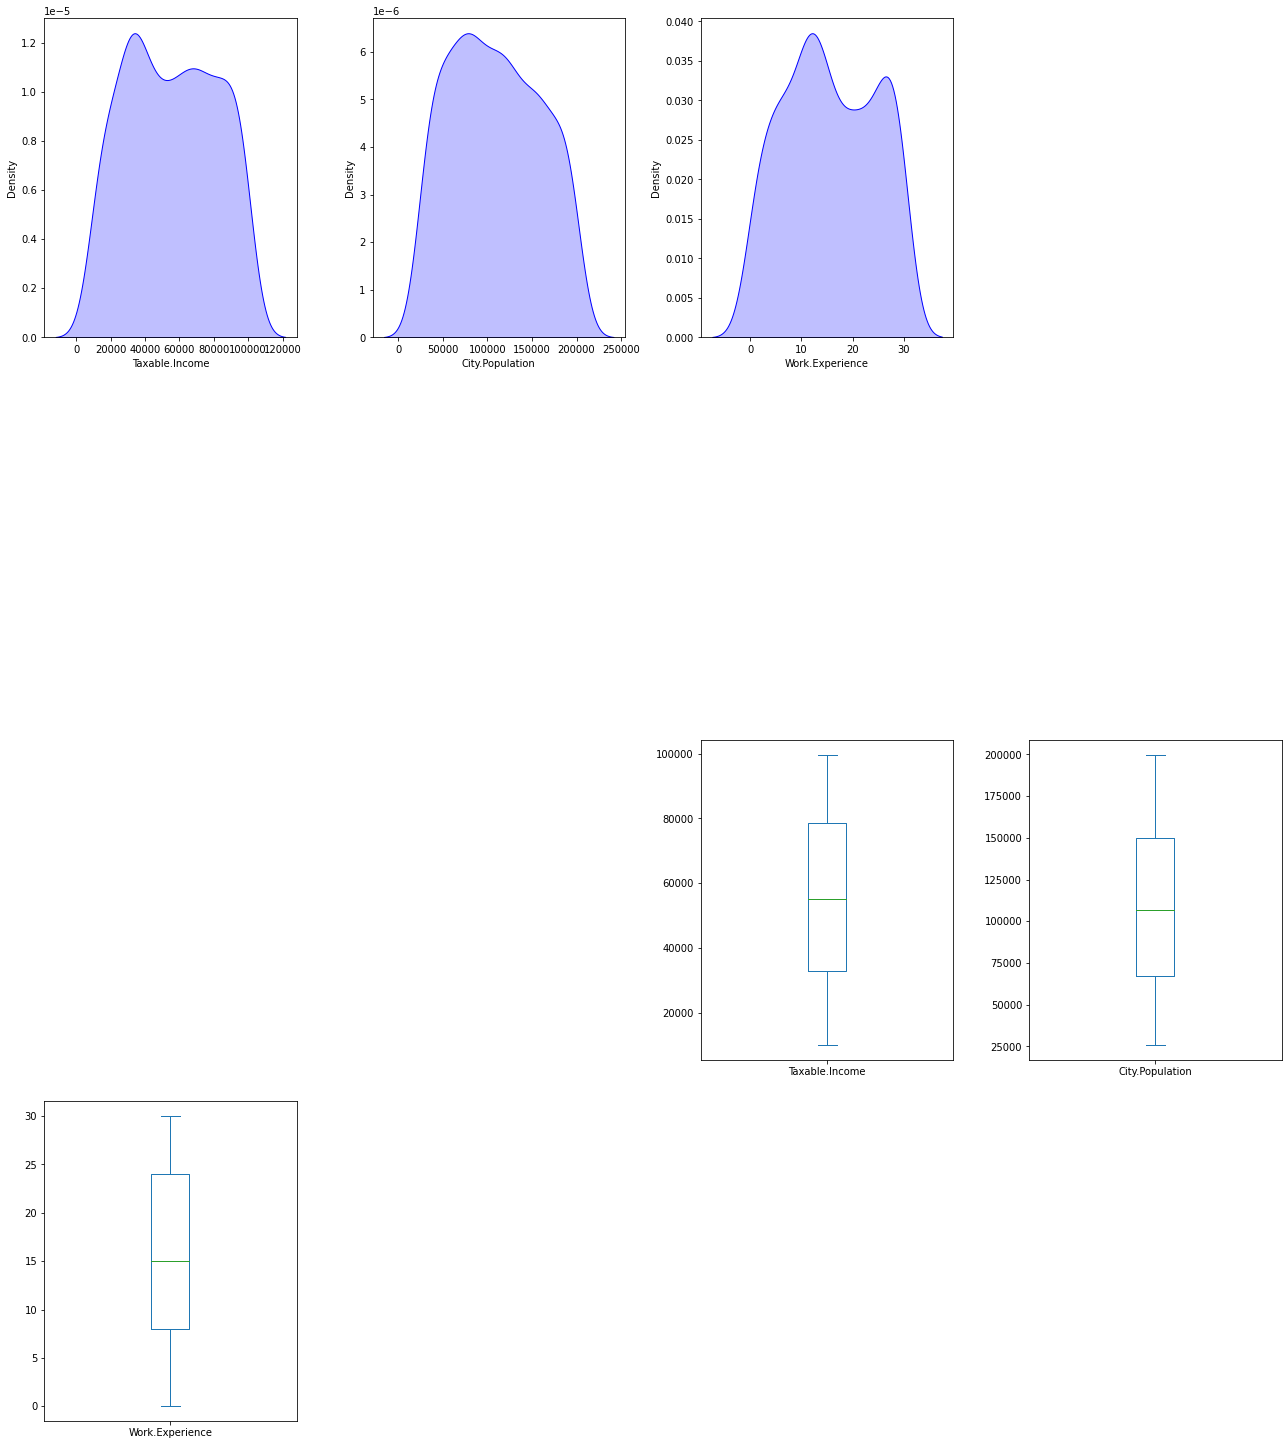

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [72]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='blue',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

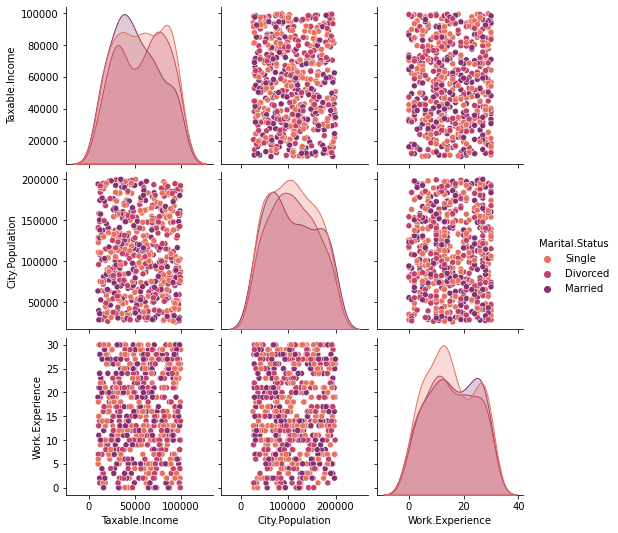

In [73]:
sns.pairplot(df1, hue = 'Marital.Status', palette='flare')

In [74]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [75]:
corr = df1.corr()

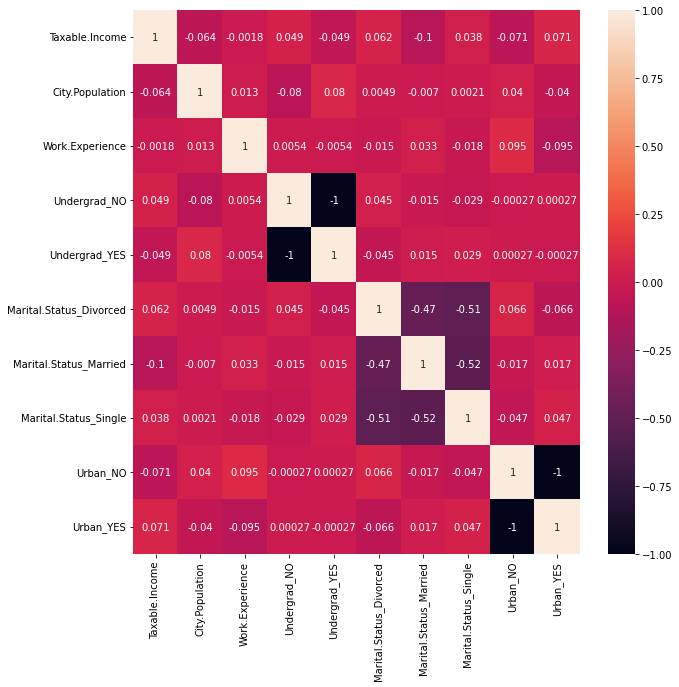

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Random Forest model

Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"   

In [77]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [78]:
df1.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [79]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [80]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [81]:
y_train.value_counts()

good     379
risky    101
Name: Taxable.Income, dtype: int64

In [82]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='gini') 
model.fit(x_train,y_train)
model.oob_score_

0.7166666666666667

In [83]:
pred_train = model.predict(x_train)

In [84]:
accuracy_score(y_train,pred_train)

1.0

In [85]:
confusion_matrix(y_train,pred_train)

array([[379,   0],
       [  0, 101]])

In [86]:
pred_test = model.predict(x_test)

In [87]:
accuracy_score(y_test,pred_test)

0.8

In [88]:
confusion_matrix(y_test,pred_test)

array([[93,  4],
       [20,  3]])

In [89]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [90]:
df_t

,Actual,Predicted
470,good,risky
121,risky,good
186,good,good
15,good,good
317,good,good
...,...,...
226,good,risky
598,good,good
422,good,good
342,good,good


In [91]:
cols = list(df1.columns)

In [92]:
predictors = cols[1:10]
target = cols[0]

In [93]:
dot_data = StringIO()

In [94]:
tree1 = model.estimators_[20]

In [95]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False)

In [96]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [97]:
graph.write_png('fraud_full.png')

True

# Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 80%


In [98]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [99]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [100]:
tree_small = rf_small.estimators_[5]

In [101]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [102]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [103]:
graph.write_png('fraud_small.png')

True

In [104]:
fraud_full = mpimg.imread('fraud_full.png') 

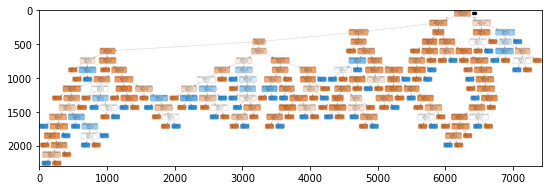

In [105]:
plt.imshow(fraud_full)

In [106]:
fraud_small = mpimg.imread('fraud_small.png') 

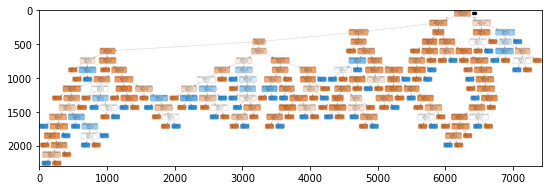

In [107]:
plt.imshow(fraud_small)

In [108]:
model.feature_importances_

array([0.52500795, 0.3536742 , 0.01831271, 0.02056375, 0.01678587,
       0.01876763, 0.01814551, 0.01318907, 0.01555332])

In [109]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [110]:
fi

,feature,importance
0,City.Population,0.525008
1,Work.Experience,0.353674
3,Undergrad_YES,0.020564
5,Marital.Status_Married,0.018768
2,Undergrad_NO,0.018313
6,Marital.Status_Single,0.018146
4,Marital.Status_Divorced,0.016786
8,Urban_YES,0.015553
7,Urban_NO,0.013189


As seen above, the table city population is the most important feature from the data.